In [19]:
import pandas as pd

# Load the training data
df = pd.read_csv('train.csv')

# Check the first few rows to confirm data loaded correctly
print(df.head())

# Check the columns to confirm Cabin and others exist
print(df.columns.tolist())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
['

In [20]:
# Basic info about dataset
print(df.info())

# Count of missing values per column
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [21]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Create HasCabin feature to flag if cabin info exists
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# Drop Cabin column since it has many missing values
df.drop('Cabin', axis=1, inplace=True)

# Fill missing Embarked values with the most common port
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [22]:
# Convert Sex to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)


In [24]:
# Family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


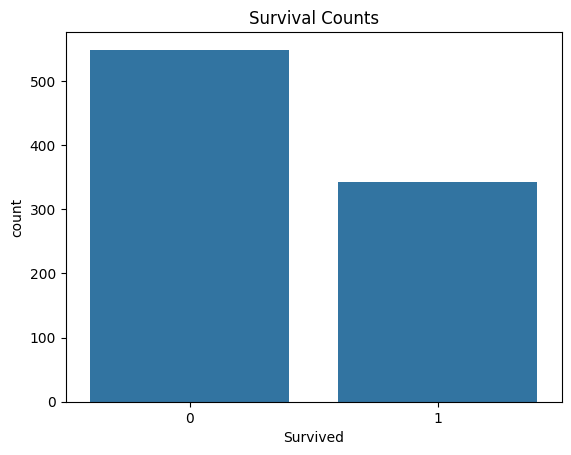

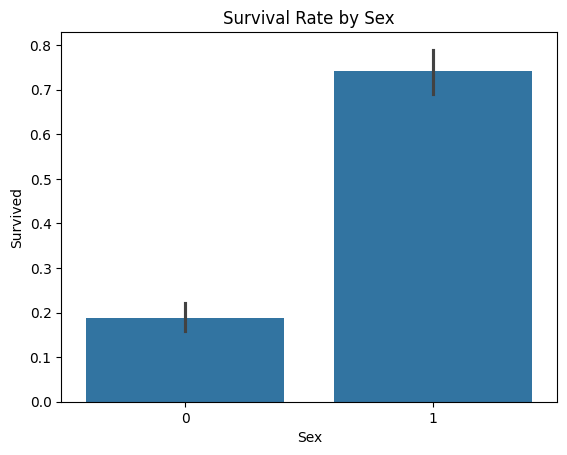

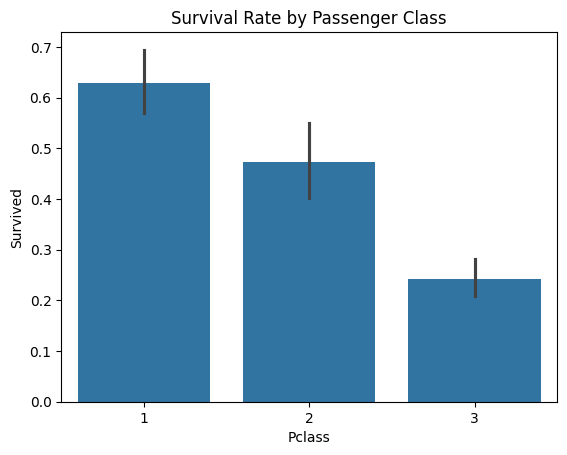

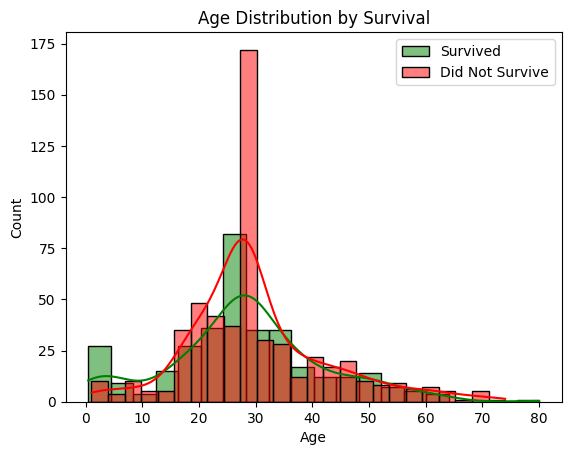

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot survival counts
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Age distribution by survival status
sns.histplot(df[df['Survived'] == 1]['Age'], color='green', label='Survived', kde=True)
sns.histplot(df[df['Survived'] == 0]['Age'], color='red', label='Did Not Survive', kde=True)
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()
